In [ ]:
#  Bisection method to estimate optimal learning rate(Group 34)

# Step 1: Required Libraries

# নিচের লাইব্রেরিগুলো ডেটা প্রসেসিং, মডেল ট্রেনিং ও ইভালুয়েশনের জন্য দরকার।

import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import SGDClassifier

from sklearn.metrics import log_loss, accuracy_score



In [ ]:
# Step 2: Load the Iris Dataset

# Iris ডেটাসেটটি লোড করা হচ্ছে।

df = pd.read_csv('Iris.csv')

In [ ]:
# ডেটাসেটের প্রথম ৫টি সারি দেখানো হচ্ছে।

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# ডেটাসেটের সারি ও কলামের সংখ্যা দেখানো হচ্ছে।

df.shape

(150, 6)

In [ ]:
# ডেটাসেটে কোনো missing value আছে কিনা চেক করা হচ্ছে।

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# Step 3: Prepare Features and Target

# Feature (X) এবং Target (y) আলাদা করা হচ্ছে।

X = df.drop("Species", axis=1)

y = df["Species"]



# Target label গুলোকে সংখ্যায় রূপান্তর করা হচ্ছে (Label Encoding)।

encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [ ]:
# Step 4: Split into Train and Validation Sets

# ডেটাসেটকে ট্রেন ও ভ্যালিডেশন সেটে ভাগ ক
# রা হচ্ছে।

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Standardize the data

# ফিচারগুলোকে স্কেল করা হচ্ছে যাতে সবগুলো একই স্কেলে থাকে।

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)

In [ ]:
# Step 6: Function to Train Model and Return Loss

# এই ফাংশনটি নির্দিষ্ট learning rate দিয়ে মডেল ট্রেন করে এবং validation loss রিটার্ন করে।

def train_model(learning_rate):

    model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=learning_rate, max_iter=1000, tol=1e-3, random_state=42)

    model.fit(X_train, y_train)

    y_prob = model.predict_proba(X_val)

    loss = log_loss(y_val, y_prob)

    return loss

In [ ]:
# Step 7: Bisection/Ternary Search to Find Optimal Learning Rate

# এই ফাংশনটি বাইনারি/টারনারি সার্চ ব্যবহার করে সবচেয়ে ভালো learning rate খুঁজে বের করে।

def find_best_learning_rate(low=1e-6, high=1.0, tolerance=1e-4, max_iter=25):

    for _ in range(max_iter):

        mid1 = low + (high - low) / 3

        mid2 = high - (high - low) / 3



        loss1 = train_model(mid1)

        loss2 = train_model(mid2)



        if loss1 < loss2:

            high = mid2

        else:

            low = mid1



        if abs(high - low) < tolerance:

            break



    return (low + high) / 2

In [ ]:
# Step 8: Estimate Optimal Learning Rate

# উপরের ফাংশন ব্যবহার করে সবচেয়ে ভালো learning rate বের করা হচ্ছে।

best_lr = find_best_learning_rate()

print(f"🔍 Best learning rate found: {best_lr:.6f}")

🔍 Best learning rate found: 0.999955


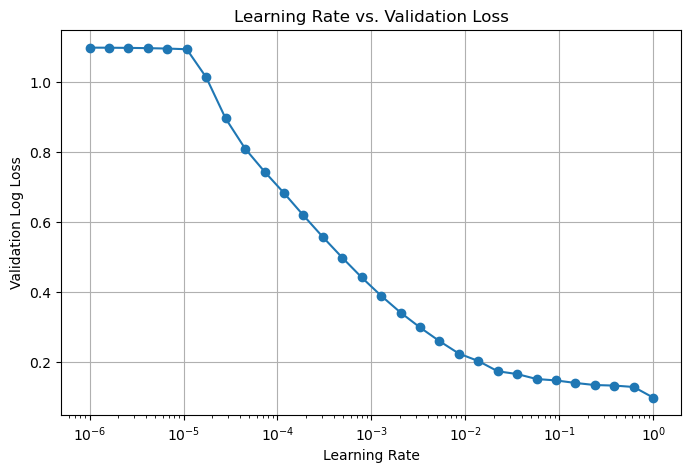

In [ ]:
# Step 8.1: Plot Learning Rate vs. Validation Loss

# বিভিন্ন learning rate এর জন্য validation loss এর গ্রাফ আঁকা হচ্ছে।

import matplotlib.pyplot as plt

learning_rates = np.logspace(-6, 0, 30)

losses = [train_model(lr) for lr in learning_rates]

plt.figure(figsize=(8,5))

plt.plot(learning_rates, losses, marker='o')

plt.xscale('log')

plt.xlabel('Learning Rate')

plt.ylabel('Validation Log Loss')

plt.title('Learning Rate vs. Validation Loss')

plt.grid(True)

plt.show()

In [ ]:
# Step 9: Train Final Model with Best Learning Rate

# পাওয়া learning rate দিয়ে ফাইনাল মডেল ট্রেন করা হচ্ছে।

final_model = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=best_lr, max_iter=1000, tol=1e-3, random_state=42)

final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_val)

In [ ]:
# Step 10: Accuracy Check

# ফাইনাল মডেলের accuracy চেক করা হচ্ছে।

accuracy = accuracy_score(y_val, y_pred)

print(f"✅ Validation Accuracy using best learning rate: {accuracy:.4f}")

✅ Validation Accuracy using best learning rate: 1.0000


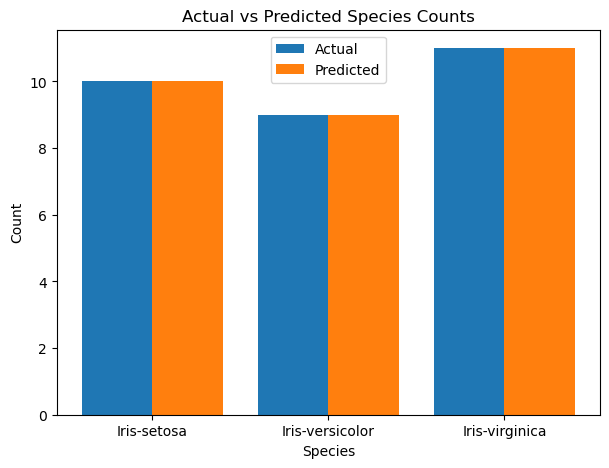

In [ ]:
# Step 11: Bar Chart of Predicted vs Actual Species Counts

# আসল ও প্রেডিক্টেড স্পিসিসের সংখ্যা তুলনা করে বার চার্ট আঁকা হচ্ছে।

import matplotlib.pyplot as plt

species_names = encoder.classes_

actual_counts = np.bincount(y_val)

pred_counts = np.bincount(y_pred)

x = np.arange(len(species_names))

plt.figure(figsize=(7,5))

plt.bar(x - 0.2, actual_counts, width=0.4, label='Actual')

plt.bar(x + 0.2, pred_counts, width=0.4, label='Predicted')

plt.xticks(x, species_names)

plt.xlabel('Species')

plt.ylabel('Count')

plt.title('Actual vs Predicted Species Counts')

plt.legend()

plt.show()